# Convnet pré-treinada

Uma abordagem comum e altamente eficaz para treinar modelos profudons em pequenos conjuntos de dados é aproveitar os pesos de uma rede pré-treinada. 

Uma rede pré-treinada é simplesmente um modelo com os pesos salvos. Se o conjunto de dados original for grande o suficiente e geral o suficiente, então os filtros espaciais aprendidos pela rede pré-treinada pode efetivamente atuar como um modelo genérico para extraír feturers de outras imegens. 

Isto chama-se Transfer Learning e é uma vantagem importante do aprendizado profundo em comparação com ML tradicional.



### Exemplo:

Irémos construír um exemplo de classifricação de cats and dogs usando uma convnet treinada no conjunto de dados ImageNet (1,4 milhão de imagens rotuladas e 1000 classes diferentes). 

O ImageNet contém muitas classes de animais, incluindo diferentes espécies de cães e gatos, e podemos esperar um desempenho muito bom em nosso problema de classificação de cães e gatos.

---

Usaremos a arquitetura VGG16, desenvolvida por Karen Simonyan e Andrew Zisserman em 2014, uma arquitetura convnet simples e amplamente utilizada para ImageNet. 

Embora seja um modelo um pouco antigo, o escolhemos porque sua arquitetura é simples de implementar.

[Very Deep Convolutional Networks for Large-Scale Image Recognition](https://arxiv.org/abs/1409.1556)




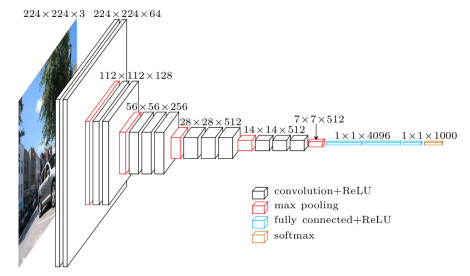

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers

In [ ]:
height = 224
width = 224
channels = 3
classes = 1000

def build_model():
    img_input = layers.Input(shape=(height, width, channels))

    # Block 1
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv1')(img_input)
    x = layers.Conv2D(64, (3, 3), activation='relu', padding='same', name='block1_conv2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block1_pool')(x)

    # Block 2
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv1')(x)
    x = layers.Conv2D(128, (3, 3), activation='relu', padding='same', name='block2_conv2')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block2_pool')(x)

    # Block 3
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv1')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv2')(x)
    x = layers.Conv2D(256, (3, 3), activation='relu', padding='same', name='block3_conv3')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block3_pool')(x)

    # Block 4
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same',name='block4_conv1')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same',name='block4_conv2')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block4_conv3')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block4_pool')(x)

    # Block 5
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv1')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv2')(x)
    x = layers.Conv2D(512, (3, 3), activation='relu', padding='same', name='block5_conv3')(x)
    x = layers.MaxPooling2D((2, 2), strides=(2, 2), name='block5_pool')(x)

    # Classification block
    x = layers.Flatten(name='flatten')(x)
    x = layers.Dense(4096, activation='relu', name='fc1')(x)
    x = layers.Dense(4096, activation='relu', name='fc2')(x)
    prediction = layers.Dense(1000, activation='softmax', name='predictions')(x)

    # Create model.
    model = keras.Model(img_input, prediction, name='vgg16')

    model.summary()
    # x = layers.GlobalAveragePooling2D()(x)
    # x = layers.GlobalMaxPooling2D()(x)

    return model

In [ ]:
# model1 é o modelo pré-treinado
model1 = build_model()

model1.save('VGG16.h5')

model1.save_weights('VGG16_weights.h5')

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_26 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
#funcao para criar um vgg block
def vgg_block(layer_in, n_filters, n_conv):
  #adicionar camadas de convolucao
  for _ in range(n_conv):
    layer_in = layers.Conv2D(n_filters, (3,3), activation='relu', padding='same')(layer_in)
    
  layer_in = layers.MaxPooling2D((2,2), strides=(2,2))(layer_in)
  return layer_in

In [ ]:
def build_model():
  img_input = layers.Input(shape=(height, width, channels))
  x = vgg_block(img_input, 64, 2)
  x = vgg_block(x, 128, 2)
  x = vgg_block(x, 256, 3)
  x = vgg_block(x, 512, 3)
  x = vgg_block(x, 512, 3)

  # Classification block
  x = layers.Flatten(name='flatten')(x)
  x = layers.Dense(4096, activation='relu', name='fc1')(x)
  x = layers.Dense(4096, activation='relu', name='fc2')(x)
  prediction = layers.Dense(1000, activation='softmax', name='predictions')(x)

  # Create model.
  model = keras.Model(img_input, prediction, name='vgg16')

  model.summary()
  # x = layers.GlobalAveragePooling2D()(x)
  # x = layers.GlobalMaxPooling2D()(x)

  return model

O próximo passo seria, treinar o modelo no dataset ImageNet e salvar os pesos do modelo:


```
model.fit()

model.save_weights("VGG16_weights.h5")

load_model = model.load_weights("VGG16_weights.h5")
```

Depois de carregar novamente o modelo temos diponível um classificador treinado.


In [ ]:
# carregamos o modelo pré-treinado em model2
model2 = build_model()

model2.load_weights('VGG16_weights.h5')

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_27 (InputLayer)        [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv2d_80 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 56, 56, 128)       0     

In [ ]:
print(model2.layers)

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fc1119c22b0>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc111a3f400>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc111a3d0b8>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc111a3dc18>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc11157fc18>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc111a3fd30>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc111a3fcf8>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc111a3fd68>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc111a9aa20>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc1119d5240>, <tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7fc1119dd550>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7fc1119d5908>, <tensorflow.python.keras.layers.convo

Agora retiramos as últimas camadas densas e adicionamos nosso pŕoprio classificador.

In [ ]:
# Create a new model by extracting layers from the original model:
# remover as ultimas 3 (tres) camadas da rede (o topo da rede/cabeça)
extracted_layers = model2.layers[:-3] 
# como uma rede neural e uma lista de camadas, 
# utiliza o append() para adicionar uma nova rede densa (classificador) adequada para o problema
extracted_layers.append(layers.Dense(1, activation='sigmoid', name='cats_and_dogs'))

model2 = keras.Sequential(extracted_layers)
model2.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_80 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_81 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_31 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_32 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 56, 56, 256)      

O próximo passo seria, treinar o modelo2 fazendo um fine-tunning nos pesos dos filtros e ajustando a útlima camada adicionada:

```
model2.fit()

```

In [ ]:
for layer in model2.layers:
    print(layer.name, layer.trainable)

conv2d_80 True
conv2d_81 True
max_pooling2d_31 True
conv2d_82 True
conv2d_83 True
max_pooling2d_32 True
conv2d_84 True
conv2d_85 True
conv2d_86 True
max_pooling2d_33 True
conv2d_87 True
conv2d_88 True
conv2d_89 True
max_pooling2d_34 True
conv2d_90 True
conv2d_91 True
conv2d_92 True
max_pooling2d_35 True
flatten True
cats_and_dogs True


In [ ]:
model2.trainable = False

for layer in model2.layers:
    print(layer.name, layer.trainable)

conv2d_80 False
conv2d_81 False
max_pooling2d_31 False
conv2d_82 False
conv2d_83 False
max_pooling2d_32 False
conv2d_84 False
conv2d_85 False
conv2d_86 False
max_pooling2d_33 False
conv2d_87 False
conv2d_88 False
conv2d_89 False
max_pooling2d_34 False
conv2d_90 False
conv2d_91 False
conv2d_92 False
max_pooling2d_35 False
flatten False
cats_and_dogs False


In [ ]:
model2.layers[-1].trainable = True
for layer in model2.layers:
    print(layer.name, layer.trainable)

conv2d_80 False
conv2d_81 False
max_pooling2d_31 False
conv2d_82 False
conv2d_83 False
max_pooling2d_32 False
conv2d_84 False
conv2d_85 False
conv2d_86 False
max_pooling2d_33 False
conv2d_87 False
conv2d_88 False
conv2d_89 False
max_pooling2d_34 False
conv2d_90 False
conv2d_91 False
conv2d_92 False
max_pooling2d_35 False
flatten False
cats_and_dogs True


## Fine-tuning

[Doc keras](https://keras.io/guides/transfer_learning/)

In [ ]:
model2.trainable = True

for layer in model2.layers:
    print(layer.name, layer.trainable)

conv2d_80 True
conv2d_81 True
max_pooling2d_31 True
conv2d_82 True
conv2d_83 True
max_pooling2d_32 True
conv2d_84 True
conv2d_85 True
conv2d_86 True
max_pooling2d_33 True
conv2d_87 True
conv2d_88 True
conv2d_89 True
max_pooling2d_34 True
conv2d_90 True
conv2d_91 True
conv2d_92 True
max_pooling2d_35 True
flatten True
cats_and_dogs True


## Formas de trabalhar com modelos pré-treinados

Existem duas maneiras de utilizar uma rede pré-treinada: extração de features e fine-tuning. 

Agora veremos como utilizar a rede pré-treinada para extraír features de outro dataset.

---

A extração de features consiste em usar as representações aprendidas por uma rede anterior para extrair features de novas amostras.

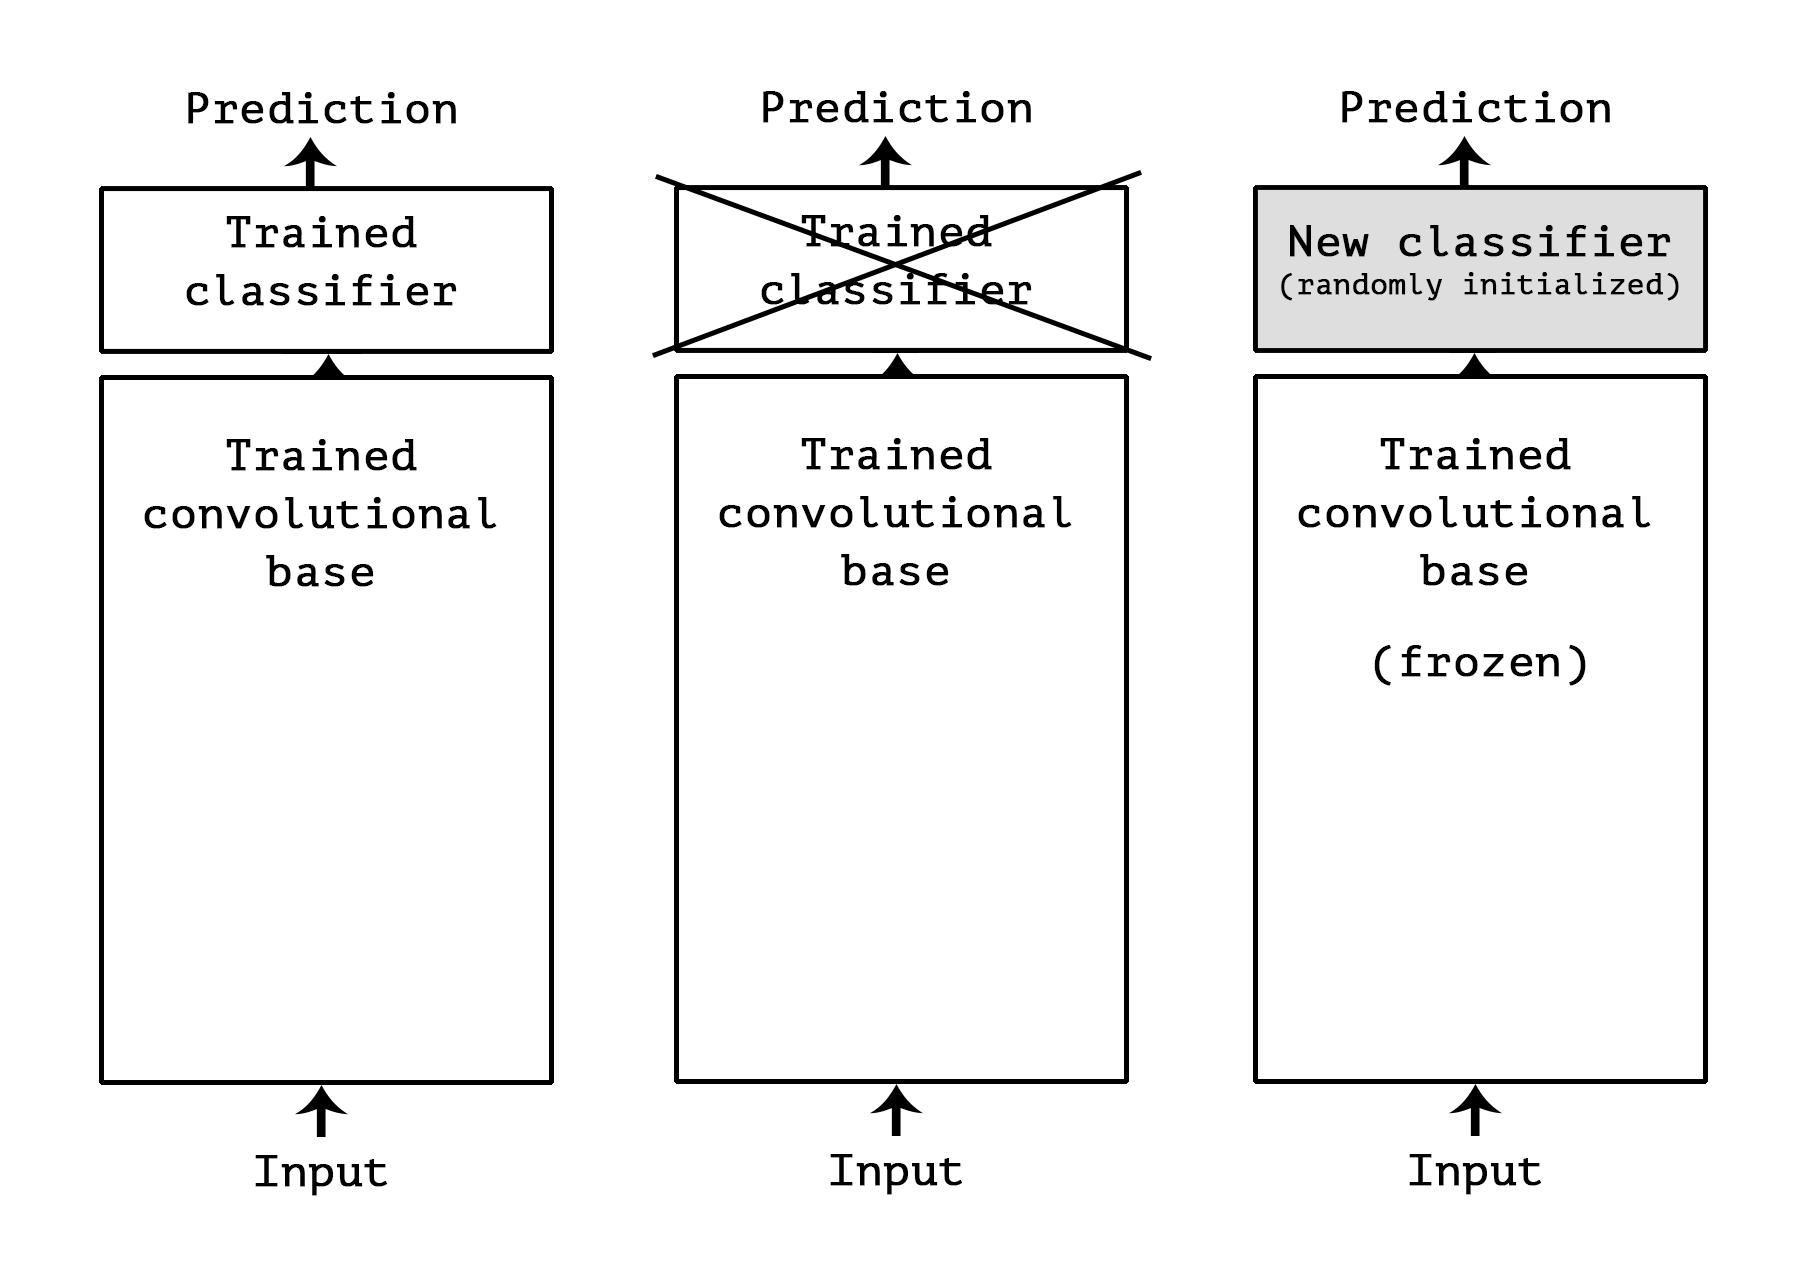

In [ ]:
# # credenciais obtidas do json que o Kaggle fornece
os.environ['KAGGLE_USERNAME'] = "eneasmesquitajr" 
os.environ['KAGGLE_KEY'] = "fd5e67b82a4eb94fb7d70a8ce0fe5977" 
!kaggle datasets download -d zeegelin/cats-and-dogs-small # api command copied from kaggle
!unzip cats-and-dogs-small.zip && rm *.zip > file.log

In [ ]:
from keras.applications import Xception, VGG16
# https://keras.io/api/applications/

conv_base = VGG16(include_top=False,
                  weights='imagenet',
                  input_shape=(150,150,3))

conv_base.summary()

In [ ]:
def my_gen():
  n = 1
  print('first')
  yield n

  n += 1
  print('second')
  yield n

  n += 1
  print('last')
  yield n

a = my_gen() # __next__
print(next(a))
print(next(a))
print(next(a))

first
1
second
2
last
3


(1, 374, 500, 3)
Found 2000 images belonging to 2 classes.
(150, 150, 3)


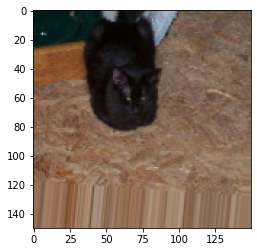

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

base_dir = 'cats_and_dogs_small'

datagen = ImageDataGenerator(rotation_range=10,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest',
                             rescale=1./255)

img = load_img('cats_and_dogs_small/train/cats/cat.0.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
print(x.shape)

generator = datagen.flow_from_directory('cats_and_dogs_small/train',
                                        target_size=(150, 150),
                                        batch_size=1,
                                        class_mode='binary')

for img, label in generator:
    img = img.reshape((150,150,3))
    print(img.shape)
    plt.imshow(img)
    break #para nao percorrer todo o dataset

# **Extração de Features**

In [ ]:
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

#extracao de features
datagen = ImageDataGenerator(rescale=1./255)

batch_size = 20
amostras = 200

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(directory,
                                            target_size=(150, 150),
                                            batch_size=batch_size,
                                            class_mode='binary')
    
    i = 0
    for inputs_batch, labels_batch in generator:
        
        features_batch = conv_base.predict(inputs_batch)

        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        print(i)
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

train_features, train_labels = extract_features(train_dir, amostras)
validation_features, validation_labels = extract_features(validation_dir, amostras)
test_features, test_labels = extract_features(test_dir, amostras)

# train_features, train_labels = extract_features(train_dir, 2000)
# validation_features, validation_labels = extract_features(validation_dir, 1000)
# test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1
2
3
4
5
6
7
8
9
10
Found 1000 images belonging to 2 classes.
1
2
3
4
5
6
7
8
9
10
Found 1000 images belonging to 2 classes.
1
2
3
4
5
6
7
8
9
10


As features extraídas tem o shape (amostras, 4, 4, 512). Vamos alimentar um classificador MLP, então primeiro devemos vetorizá-los para (amostras, 8192):

In [ ]:
train_features = np.reshape(train_features, (amostras, 4 * 4 * 512))
validation_features = np.reshape(validation_features, (amostras, 4 * 4 * 512))
test_features = np.reshape(test_features, (amostras, 4 * 4 * 512))

In [ ]:
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_dim=4 * 4 * 512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=2e-5),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(train_features, 
                    train_labels, 
                    epochs = 50, 
                    batch_size = 20, 
                    validation_data = (validation_features, validation_labels))

Epoch 1/50
10/10 [==============================] - 0s 14ms/step - loss: 0.8666 - acc: 0.4450 - val_loss: 0.6472 - val_acc: 0.5650
Epoch 2/50
10/10 [==============================] - 0s 5ms/step - loss: 0.7868 - acc: 0.4950 - val_loss: 0.6259 - val_acc: 0.6750
Epoch 3/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6457 - acc: 0.6450 - val_loss: 0.5987 - val_acc: 0.7300
Epoch 4/50
10/10 [==============================] - 0s 5ms/step - loss: 0.6081 - acc: 0.6450 - val_loss: 0.5975 - val_acc: 0.6600
Epoch 5/50
10/10 [==============================] - 0s 5ms/step - loss: 0.5903 - acc: 0.7000 - val_loss: 0.5325 - val_acc: 0.8000
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.5076 - acc: 0.7550 - val_loss: 0.5428 - val_acc: 0.7300
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5322 - acc: 0.7250 - val_loss: 0.5070 - val_acc: 0.8000
Epoch 8/50
10/10 [==============================] - 0s 6ms/step - loss: 0.4515 - acc: 0.7

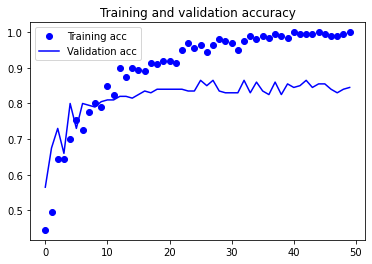

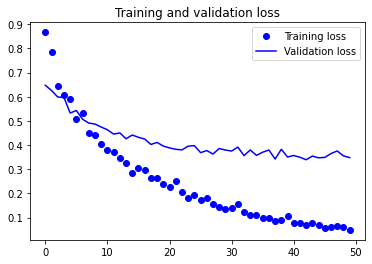

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

# **Fine-Tuning**

In [ ]:
from keras import models, layers

# se queremos o fine-tuning então declaramos True, senão False
conv_base.trainable = True

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               2097408   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

# Observe que os dados de teste/validação nunca devem ser aumentados!
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary' )

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['acc'])

history = model.fit(train_generator,
#                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 23s 233ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6932 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 23s 232ms/step - loss: 0.6932 - acc: 0.4850 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 23s 228ms/step - loss: 0.6932 - acc: 0.4880 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 4/30
100/100 [==============================] - 23s 229ms/step - loss: 0.6932 - acc: 0.4890 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 5/30
100/100 [==============================] - 23s 230ms/step - loss: 0.6932 - acc: 0.4880 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 6/30
100/100 [==============================] - 23s 231ms/step - loss: 0.6932 - acc: 0.5000 - val_loss: 0.6931 - val_acc: 0.5000
Epoch 7/30
100/100 [==============================] - 23s 230ms/step - loss: 0.6932 - acc: 0.4950 - val_lo

KeyboardInterrupt: ignored

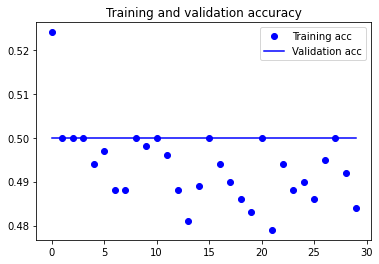

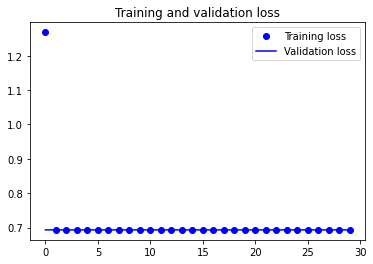

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

Novos testes

In [ ]:
from keras import models, layers
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
from keras.applications import VGG16
from keras.optimizers import Adam

# # credenciais obtidas do json que o Kaggle fornece
os.environ['KAGGLE_USERNAME'] = "eneasmesquitajr" 
os.environ['KAGGLE_KEY'] = "fd5e67b82a4eb94fb7d70a8ce0fe5977" 
!kaggle datasets download -d zeegelin/cats-and-dogs-small # api command copied from kaggle
!unzip cats-and-dogs-small.zip && rm *.zip > file.log

base_dir = 'cats_and_dogs_small'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

conv_base = []

conv_base = VGG16(include_top=False,
                  weights='imagenet',
                  input_shape=(150,150,3) )

for layer in conv_base.layers:
    layer.trainable = True

# conv_base.trainable = True

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation = 'relu'))
model.add(layers.Dense(1, activation = 'sigmoid'))

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest' )

# Observe que os dados de teste/validação nunca devem ser aumentados!
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary' )

model.compile(loss = 'binary_crossentropy',
              optimizer = Adam(1e-5),
              metrics = ['acc'])

history = model.fit(train_generator,
                    steps_per_epoch=100,
                    epochs=30,
                    validation_data=validation_generator,
                    validation_steps=50)

100% 86.7M/86.7M [00:00<00:00, 111MB/s] 

Archive:  cats-and-dogs-small.zip
replace cats_and_dogs_small/test/cats/cat.1500.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/30
100/100 [==============================] - 24s 238ms/step - loss: 0.5229 - acc: 0.7435 - val_loss: 0.2392 - val_acc: 0.9080
Epoch 2/30
100/100 [==============================] - 24s 238ms/step - loss: 0.2972 - acc: 0.8685 - val_loss: 0.1738 - val_acc: 0.9270
Epoch 3/30
100/100 [==============================] - 24s 237ms/step - loss: 0.2236 - acc: 0.9095 - val_loss: 0.1428 - val_acc: 0.9460
Epoch 4/30
100/100 [==============================] - 24s 239ms/step - loss: 0.1751 - acc: 0.9335 - val_loss: 0.1076 - val_acc: 0.9540
Epoch 5/30
100/100 [==============================] - 24s 238ms/step - loss: 0.1611 - acc: 0.9385 - val_loss: 0.1139 - val_acc: 0.9580
Epoch 6/30
100/100 [==============================] - 24s 239ms/step - lo

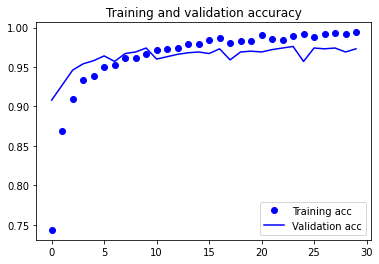

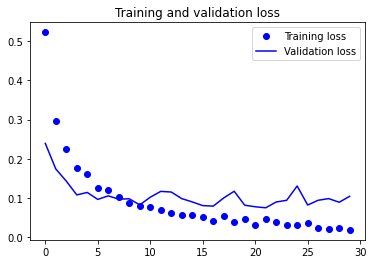

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()